# 선형회귀

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 단순성형회귀 모델 만들기

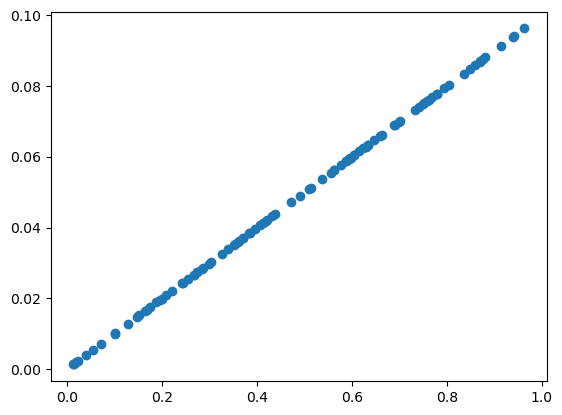

In [3]:
X = np.random.rand(100)
y = 0.2 * X * 0.5 # ax+b

plt.scatter(X,y)

In [4]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [5]:
# 경사하강법 y = xW + b, w 결정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5 # 임의 값

Epoch 0, W: -0.2639, Error: 0.9050


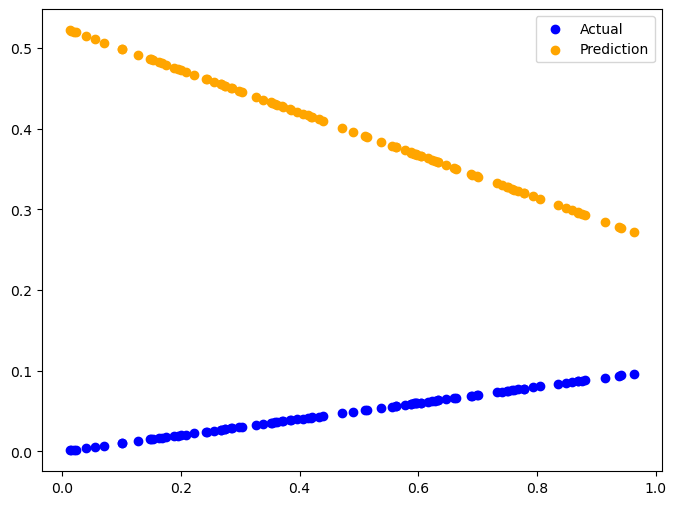

Epoch 10, W: -0.2803, Error: 0.0886


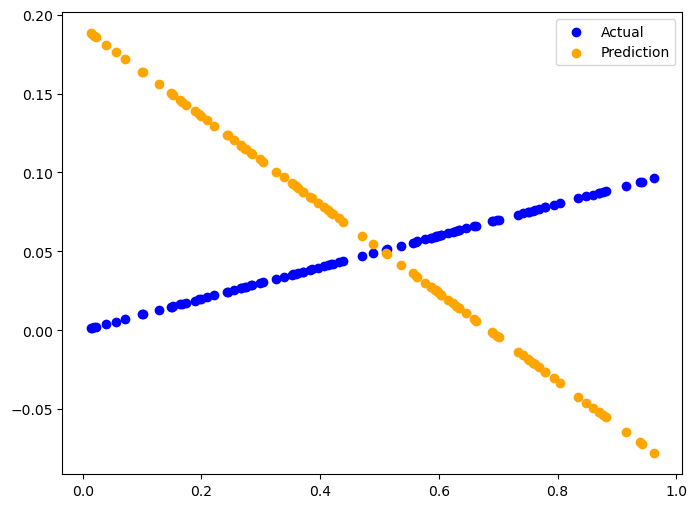

Epoch 20, W: -0.1885, Error: 0.0672


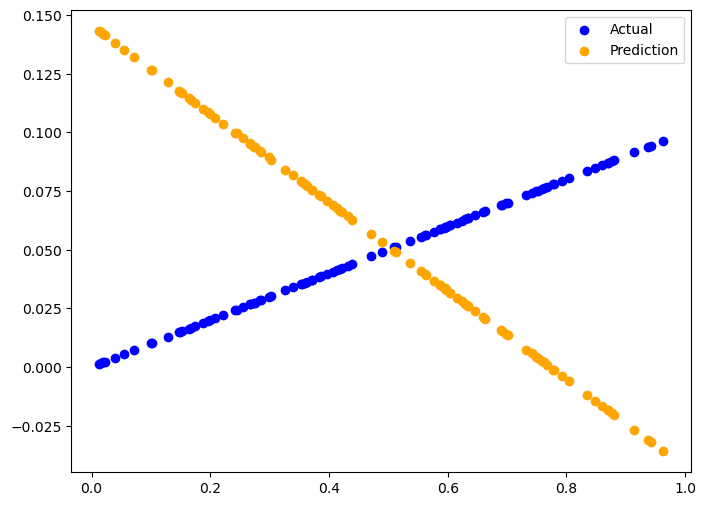

Epoch 30, W: -0.1188, Error: 0.0510


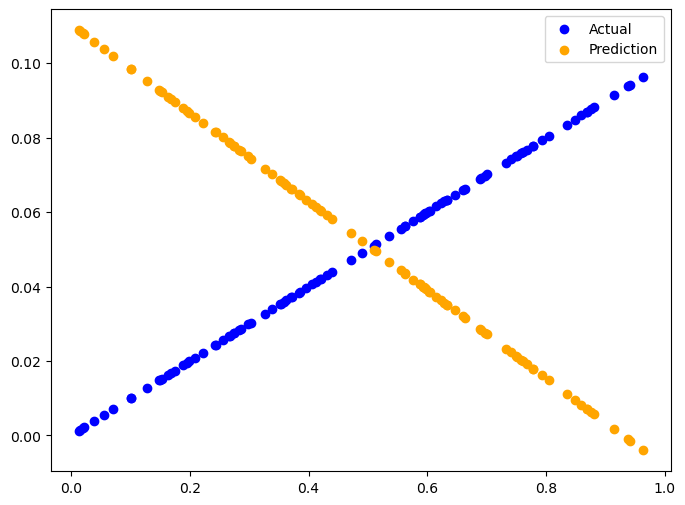

Epoch 40, W: -0.0659, Error: 0.0387


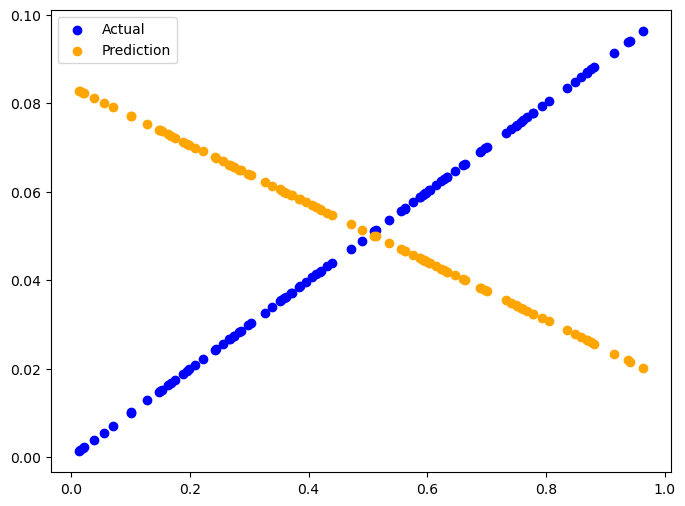

Epoch 50, W: -0.0259, Error: 0.0293


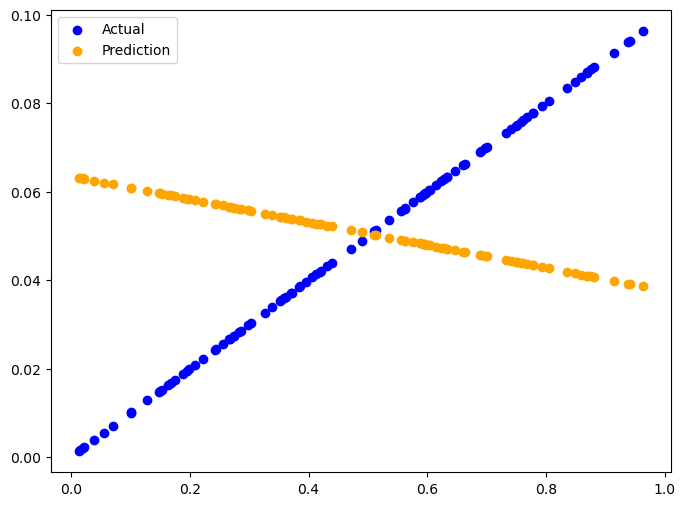

Epoch 60, W: 0.0045, Error: 0.0223


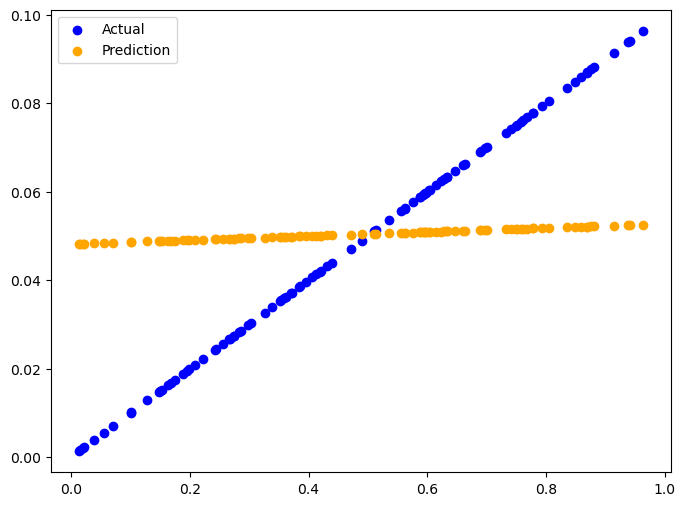

Epoch 70, W: 0.0276, Error: 0.0169


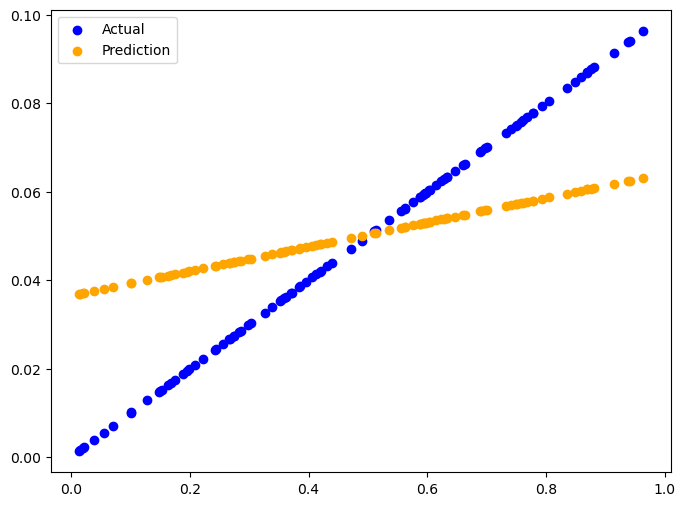

Epoch 80, W: 0.0451, Error: 0.0128


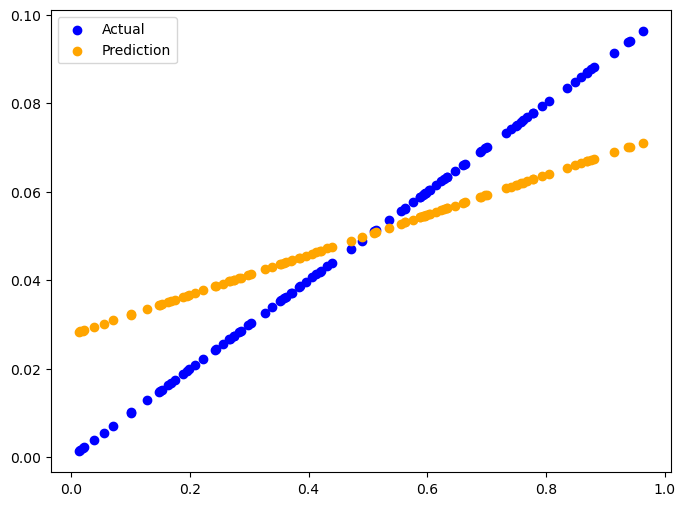

Epoch 90, W: 0.0583, Error: 0.0097


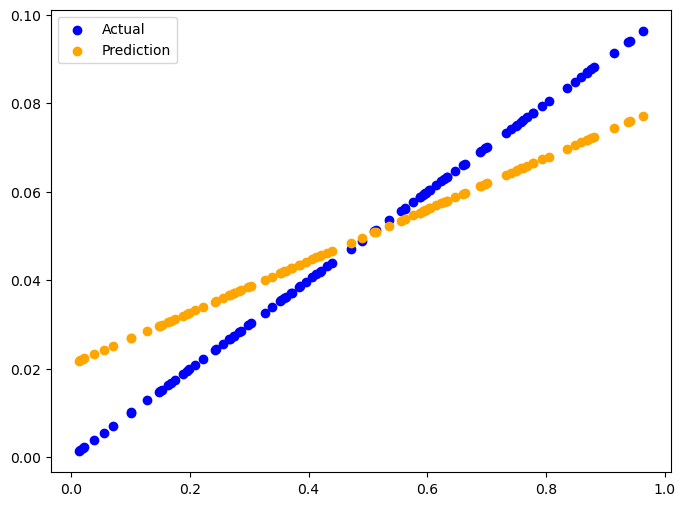

In [6]:
for epoch in range (100):
    y_pred = W * X + b
    error = np.abs(y_pred - y).mean()
    if error < 0.001: 
        break
    W_descent = learning_rate * ((y_pred - y) * X).mean()
    b_descent = learning_rate * ((y_pred - y).mean())
    W = W - W_descent
    b = b - b_descent
    
    if epoch%10 == 0:
        print(f'Epoch {epoch}, W: {W:.4f}, Error: {error:.4f}')
        y_pred = W * X + b
        plt_prediction(y_pred, y)

# 보스턴 data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
bostonDF = pd.read_csv('data/boston.csv')
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [9]:
X = bostonDF.drop('target', axis = 1).values
y = bostonDF['target'].values
bostonDF.shape

(506, 14)

In [10]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [12]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(4.158956107955705), np.float64(17.296915907902065))

In [13]:
# 결정계수
r2_score(y_test, y_pred)

np.float64(0.7572263323138934)

In [14]:
# 회귀식
# W1, W0
lr.intercept_, lr.coef_

(np.float64(40.99559517216439),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

y = x0 + w1 * X1 + x2 * X2 + ... w13 * X13

In [15]:
np.round(lr.intercept_, 1), np.round(lr.coef_, 1) # 위에 있는 식을 계산한 결과

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [16]:
pd.Series(data = np.round(lr.coef_, 1), index = bostonDF.drop('target', axis = 1).columns).sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = 5)
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [18]:
# MSE, RMSE
RMSE = np.sqrt(neg_mse_scores * -1)
np.mean(RMSE), RMSE

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [19]:
# R2
r2_scores = cross_val_score(lr, X, y, scoring = 'r2', cv = 5)
r2_scores, np.mean(r2_scores)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

오차가 커지고 (4.15 -> 5.82), 결정계수는 작아진 결과 

# 다항회귀 모델

y = w0 + w1X1 + w2X2 +w3X1^2 + w4X2^2

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 156)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('linear', LinearRegression())]
)
model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [22]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(15.555752307472005)

In [23]:
r2_score(y_test, pred_poly)

np.float64(0.7816647163338353)

2차 ~ 5차 다항회귀 시뮬레이션

In [24]:
results = []

for degree in range(1, 5):
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree = degree, include_bias = False)),
        ('linear', LinearRegression())]
    )
    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_test)
    mse = mean_squared_error(y_test, pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_poly)
    
    results.append({'degree': degree,
                    'MSE': mse,
                    'RMSE': rmse,
                    'R2':r2})
    
pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,17.296916,4.158956,0.757226
1,2,15.555752,3.944078,0.781665
2,3,79625.592348,282.180071,-1116.597912
3,4,170599.948638,413.037466,-2393.483240


In [25]:
from sklearn.ensemble import RandomForestRegressor

results = []

for degree in range(1, 6):
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree = degree, include_bias = False)),
        ('random', RandomForestRegressor())]
    )
    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_test)
    mse = mean_squared_error(y_test, pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_poly)
    
    results.append({'degree': degree,
                    'MSE': mse,
                    'RMSE': rmse,
                    'R2':r2})
    
pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,7.822943,2.796952,0.890200
1,2,8.292081,2.879597,0.883615
2,3,7.174996,2.678618,0.899294
3,4,6.912731,2.629207,0.902975
4,5,7.693264,2.773673,0.892020
